In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Height-Weight Data.csv')

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [6]:
df.shape

(3501, 2)

In [7]:
from sklearn.model_selection import train_test_split as tts

In [8]:
x=df[['Height']]
y=df['Weight']

In [10]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [11]:
xtrain, xtest, ytrain, ytest= tts(x,y,train_size=.70, random_state=1)

In [12]:
xtrain.head()

,Height
221,66.786927
2696,65.192862
1334,68.390109
3402,68.145621
1159,71.647580


In [13]:
ytrain.head()

221     165.431242
2696    185.348211
1334    179.352182
3402    197.476930
1159    200.286509
Name: Weight, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
lr.predict(xtest)

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [19]:
lr.predict([[71]])

array([198.57288177])

In [20]:
lr.coef_

array([5.97744946])

In [21]:
lr.intercept_

-225.82603000755844

In [23]:
df['Predicted Weight']= lr.predict(df[['Height']])

In [25]:
df.head()

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, lr.predict(x))

In [27]:
mse

106.01097113124197

In [28]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y, lr.predict(x))
mae

8.070522808716397

Text(0, 0.5, 'Weight in kg')

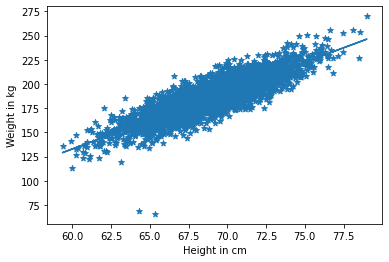

In [30]:
plt.scatter(df['Height'], df['Weight'], marker='*')
plt.plot(x, lr.predict(x))
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

In [31]:
lr.score(x,y)

0.7323100609319788